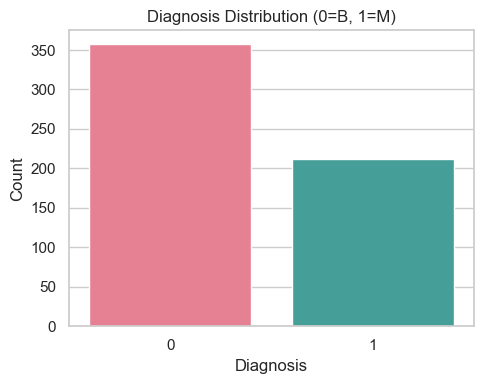

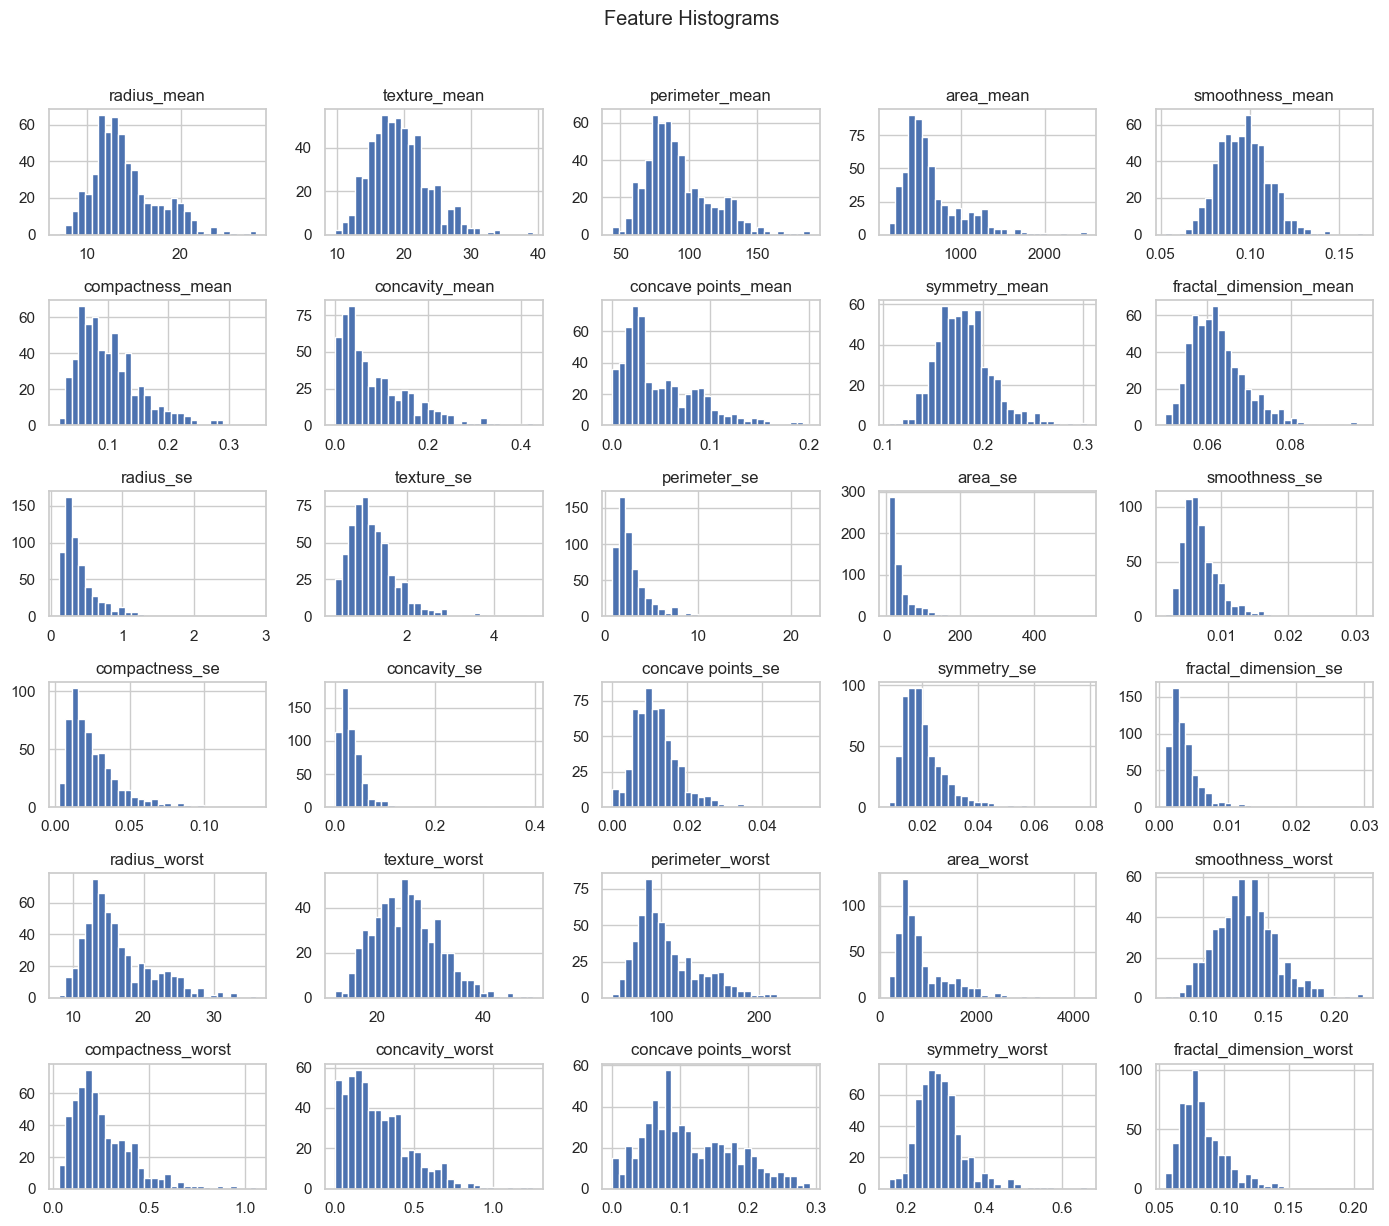

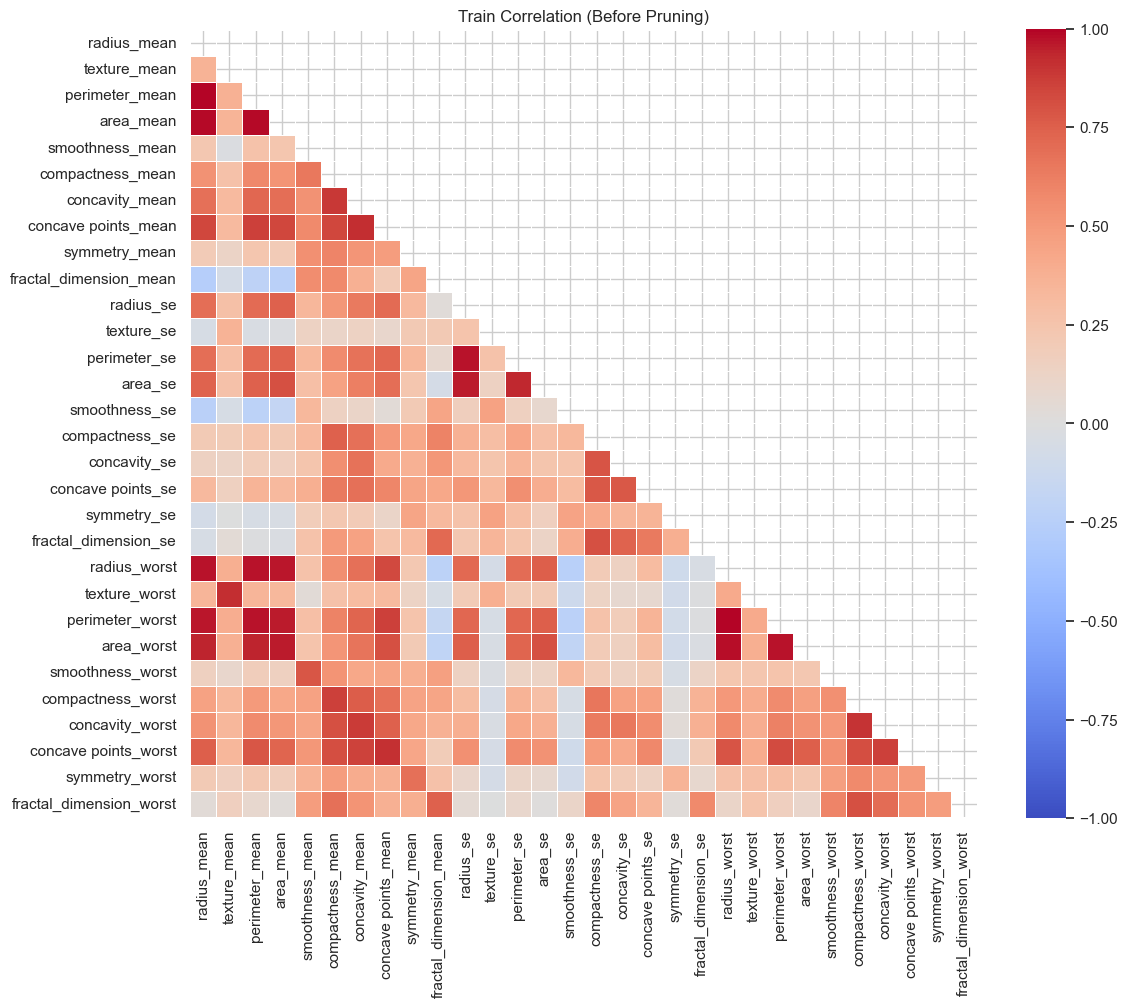

Dropped for high correlation (>|0.95|): ['perimeter_mean', 'area_mean', 'perimeter_se', 'area_se', 'radius_worst', 'perimeter_worst', 'area_worst']


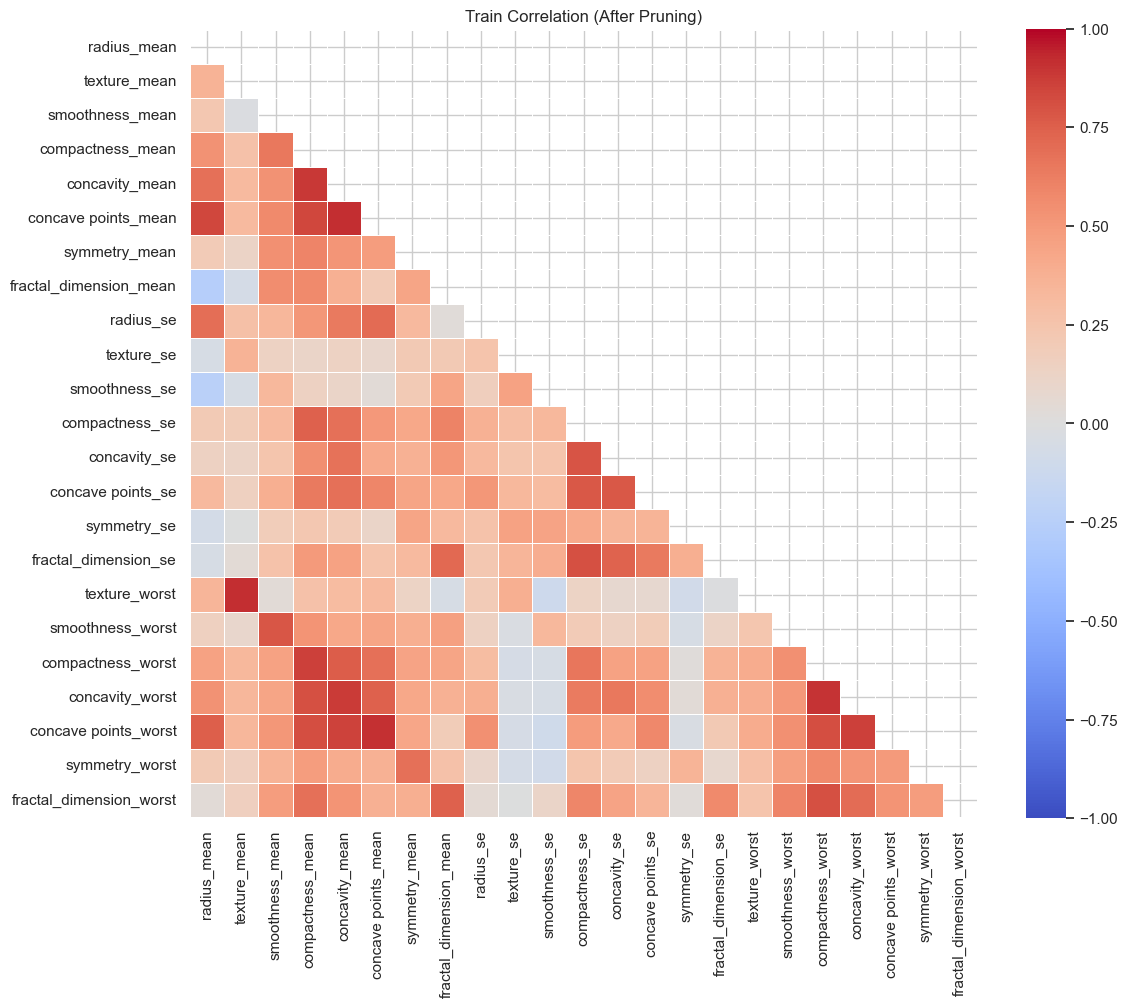

PCA retains 10 components (0.9509 variance)


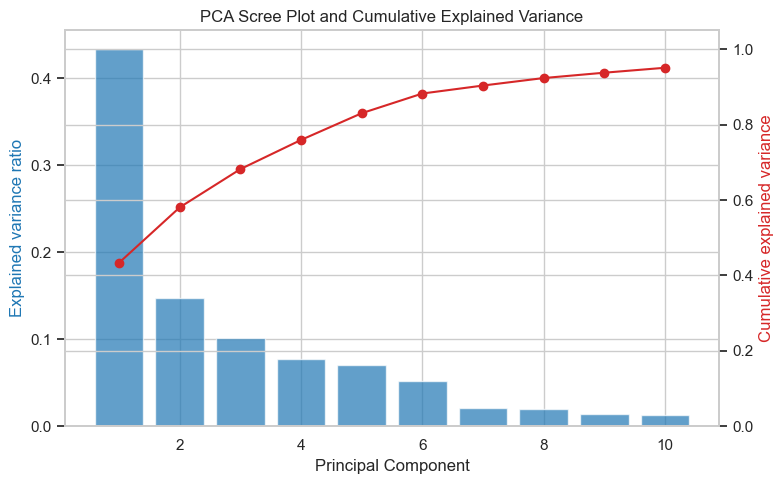

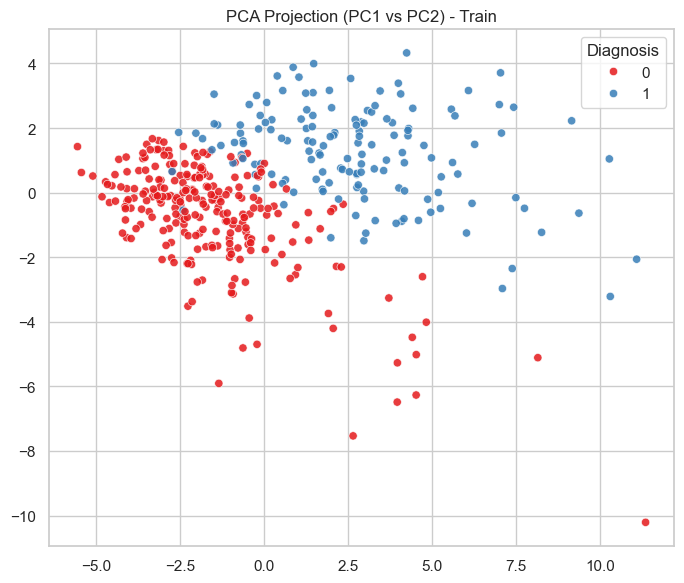


Cross-validation (train set) and Test performance:

=== LogReg ===
CV Accuracy: 0.9749 (+/- 0.0224)
Test Accuracy: 0.9532
Classification Report:
              precision    recall  f1-score   support

           0     0.9459    0.9813    0.9633       107
           1     0.9667    0.9062    0.9355        64

    accuracy                         0.9532       171
   macro avg     0.9563    0.9438    0.9494       171
weighted avg     0.9537    0.9532    0.9529       171

Confusion Matrix:
 [[105   2]
 [  6  58]]


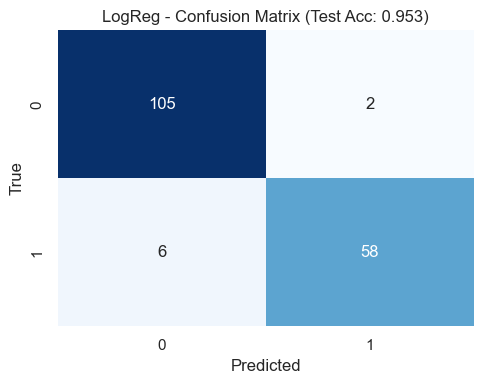


=== DecisionTree ===
CV Accuracy: 0.9122 (+/- 0.0420)
Test Accuracy: 0.9181
Classification Report:
              precision    recall  f1-score   support

           0     0.9346    0.9346    0.9346       107
           1     0.8906    0.8906    0.8906        64

    accuracy                         0.9181       171
   macro avg     0.9126    0.9126    0.9126       171
weighted avg     0.9181    0.9181    0.9181       171

Confusion Matrix:
 [[100   7]
 [  7  57]]


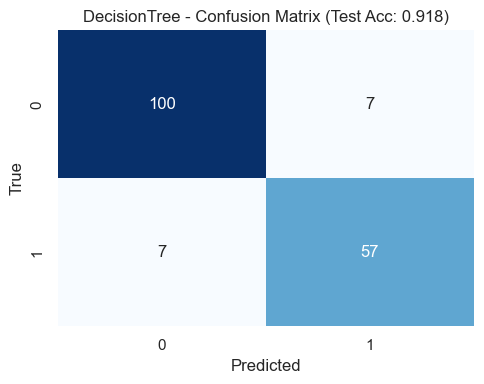


=== RandomForest ===
CV Accuracy: 0.9499 (+/- 0.0353)
Test Accuracy: 0.9474
Classification Report:
              precision    recall  f1-score   support

           0     0.9375    0.9813    0.9589       107
           1     0.9661    0.8906    0.9268        64

    accuracy                         0.9474       171
   macro avg     0.9518    0.9360    0.9429       171
weighted avg     0.9482    0.9474    0.9469       171

Confusion Matrix:
 [[105   2]
 [  7  57]]


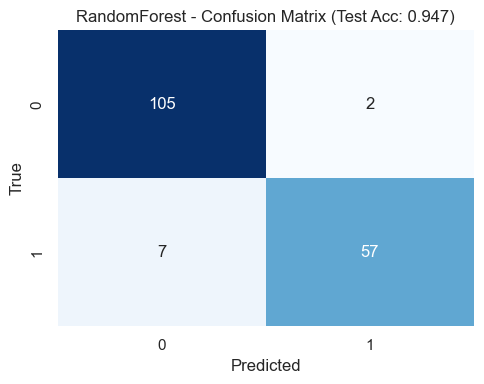


=== KNN ===
CV Accuracy: 0.9497 (+/- 0.0252)
Test Accuracy: 0.9357
Classification Report:
              precision    recall  f1-score   support

           0     0.9364    0.9626    0.9493       107
           1     0.9344    0.8906    0.9120        64

    accuracy                         0.9357       171
   macro avg     0.9354    0.9266    0.9307       171
weighted avg     0.9356    0.9357    0.9353       171

Confusion Matrix:
 [[103   4]
 [  7  57]]


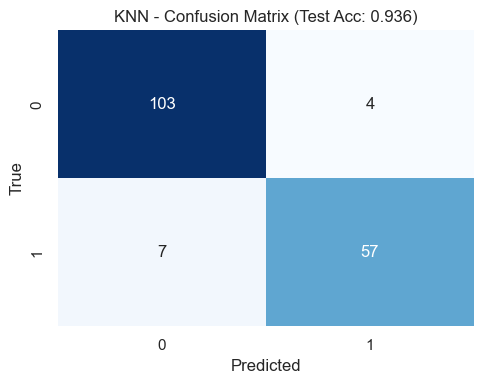


=== SVM ===
CV Accuracy: 0.9647 (+/- 0.0231)
Test Accuracy: 0.9708
Classification Report:
              precision    recall  f1-score   support

           0     0.9554    1.0000    0.9772       107
           1     1.0000    0.9219    0.9593        64

    accuracy                         0.9708       171
   macro avg     0.9777    0.9609    0.9683       171
weighted avg     0.9721    0.9708    0.9705       171

Confusion Matrix:
 [[107   0]
 [  5  59]]


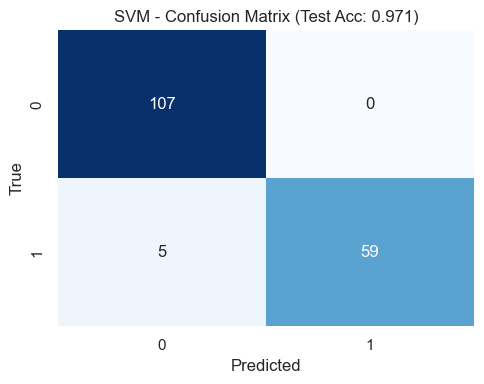


=== NaiveBayes ===
CV Accuracy: 0.9145 (+/- 0.0466)
Test Accuracy: 0.9123
Classification Report:
              precision    recall  f1-score   support

           0     0.9035    0.9626    0.9321       107
           1     0.9298    0.8281    0.8760        64

    accuracy                         0.9123       171
   macro avg     0.9167    0.8954    0.9041       171
weighted avg     0.9134    0.9123    0.9111       171

Confusion Matrix:
 [[103   4]
 [ 11  53]]


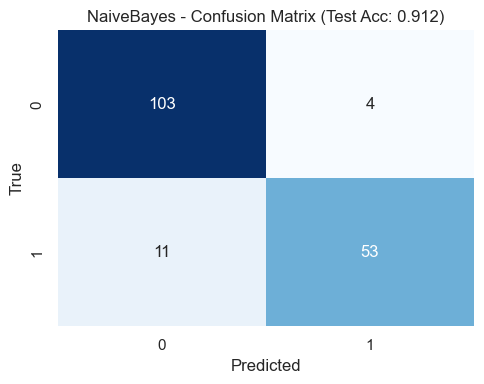


Summary (CV mean ± std):
LogReg: 0.9749 ± 0.0224
DecisionTree: 0.9122 ± 0.0420
RandomForest: 0.9499 ± 0.0353
KNN: 0.9497 ± 0.0252
SVM: 0.9647 ± 0.0231
NaiveBayes: 0.9145 ± 0.0466


In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# ----------------------------- Data Loading -----------------------------
def load_data() -> pd.DataFrame:
    csv_path = "data.csv"
    if os.path.exists(csv_path):
        df = pd.read_csv(csv_path)
        df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')
        if df['diagnosis'].dtype == object:
            df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})
        return df

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    df = pd.DataFrame(data.data, columns=data.feature_names)
    rename_map = {
        'mean radius': 'radius_mean',
        'mean texture': 'texture_mean',
        'mean perimeter': 'perimeter_mean',
        'mean area': 'area_mean',
        'mean smoothness': 'smoothness_mean',
        'mean compactness': 'compactness_mean',
        'mean concavity': 'concavity_mean',
        'mean concave points': 'concave points_mean',
        'mean symmetry': 'symmetry_mean',
        'mean fractal dimension': 'fractal_dimension_mean',
        'radius error': 'radius_se',
        'texture error': 'texture_se',
        'perimeter error': 'perimeter_se',
        'area error': 'area_se',
        'smoothness error': 'smoothness_se',
        'compactness error': 'compactness_se',
        'concavity error': 'concavity_se',
        'concave points error': 'concave points_se',
        'symmetry error': 'symmetry_se',
        'fractal dimension error': 'fractal_dimension_se',
        'worst radius': 'radius_worst',
        'worst texture': 'texture_worst',
        'worst perimeter': 'perimeter_worst',
        'worst area': 'area_worst',
        'worst smoothness': 'smoothness_worst',
        'worst compactness': 'compactness_worst',
        'worst concavity': 'concavity_worst',
        'worst concave points': 'concave points_worst',
        'worst symmetry': 'symmetry_worst',
        'worst fractal dimension': 'fractal_dimension_worst',
    }
    df = df.rename(columns=rename_map)
    df['diagnosis'] = np.where(data.target == 1, 1, 0)
    return df


# ----------------------------- Correlation Pruning -----------------------------
def prune_correlated_features(
    X_train_df: pd.DataFrame,
    X_test_df: pd.DataFrame,
    threshold: float = 0.95
):
    corr = X_train_df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    to_drop = [col for col in upper.columns if any(upper[col] > threshold)]
    X_train_pruned = X_train_df.drop(columns=to_drop)
    X_test_pruned = X_test_df.drop(columns=to_drop, errors='ignore')
    return X_train_pruned, X_test_pruned, to_drop


# ----------------------------- Plotting Helpers -----------------------------
def show_label_distribution(y: pd.Series):
    plt.figure(figsize=(5, 4))
    sns.countplot(x=y, palette='husl')
    plt.title("Diagnosis Distribution (0=B, 1=M)")
    plt.xlabel("Diagnosis")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


def show_feature_histograms(X: pd.DataFrame):
    X.hist(bins=30, figsize=(14, 12), layout=(6, 5))
    plt.suptitle("Feature Histograms", y=1.02)
    plt.tight_layout()
    plt.show()


def show_corr_heatmap(df: pd.DataFrame, title: str):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmin=-1, vmax=1, center=0,
                square=True, linewidths=0.5)
    plt.title(title)
    plt.tight_layout()
    plt.show()


def show_pca_scree_and_cumulative(pca: PCA):
    ratios = pca.explained_variance_ratio_
    cum = np.cumsum(ratios)

    fig, ax1 = plt.subplots(figsize=(8, 5))
    ax1.bar(range(1, len(ratios) + 1), ratios, alpha=0.7, color='tab:blue')
    ax1.set_xlabel('Principal Component')
    ax1.set_ylabel('Explained variance ratio', color='tab:blue')

    ax2 = ax1.twinx()
    ax2.plot(range(1, len(cum) + 1), cum, color='tab:red', marker='o')
    ax2.set_ylabel('Cumulative explained variance', color='tab:red')
    ax2.set_ylim(0, 1.05)

    plt.title('PCA Scree Plot and Cumulative Explained Variance')
    fig.tight_layout()
    plt.show()


def show_pca_scatter(X_pca: np.ndarray, y: pd.Series, title: str):
    if X_pca.shape[1] < 2:
        return
    plt.figure(figsize=(7, 6))
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', alpha=0.85)
    plt.title(title)
    plt.legend(title='Diagnosis')
    plt.tight_layout()
    plt.show()


def show_confusion_matrix(cm: np.ndarray, title: str):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.tight_layout()
    plt.show()


# ----------------------------- Main -----------------------------
def main():
    sns.set_theme(style="whitegrid")

    df = load_data()

    # Overall label distribution and histograms
    y_full = df['diagnosis'].astype(int)
    X_full = df.drop(columns=['diagnosis'])
    show_label_distribution(y_full)
    show_feature_histograms(X_full)

    # Train/test split
    X = X_full.copy()
    y = y_full.copy()
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, stratify=y, random_state=40
    )

    # Correlation heatmap BEFORE pruning (train only)
    show_corr_heatmap(X_train, "Train Correlation (Before Pruning)")

    # Prune highly correlated features on train, apply same drop to test
    X_train, X_test, dropped_cols = prune_correlated_features(X_train, X_test, threshold=0.95)
    print(f"Dropped for high correlation (>|0.95|): {dropped_cols}")

    # Correlation heatmap AFTER pruning
    show_corr_heatmap(X_train, "Train Correlation (After Pruning)")

    # PCA probe for visualization on TRAIN ONLY
    scaler_probe = StandardScaler()
    X_train_scaled_probe = scaler_probe.fit_transform(X_train)
    pca_probe = PCA(n_components=0.95, random_state=42).fit(X_train_scaled_probe)
    print(f"PCA retains {pca_probe.n_components_} components "
          f"({pca_probe.explained_variance_ratio_.sum():.4f} variance)")

    # Scree + cumulative variance and 2D projection
    show_pca_scree_and_cumulative(pca_probe)
    X_train_pca_2d = pca_probe.transform(X_train_scaled_probe)
    show_pca_scatter(X_train_pca_2d, y_train, "PCA Projection (PC1 vs PC2) - Train")

    # Models
    models = {
        "LogReg": LogisticRegression(max_iter=1000),
        "DecisionTree": DecisionTreeClassifier(random_state=42),
        "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1),
        "KNN": KNeighborsClassifier(),
        "SVM": SVC(kernel="rbf", gamma="scale"),
        "NaiveBayes": GaussianNB(),
    }

    def make_pipeline(estimator):
        return Pipeline(steps=[
            ("scale", StandardScaler()),
            ("pca", PCA(n_components=0.95, random_state=42)),
            ("clf", estimator),
        ])

    kfold = KFold(n_splits=10, shuffle=True, random_state=40)

    results = []
    print("\nCross-validation (train set) and Test performance:")
    for name, estimator in models.items():
        pipeline = make_pipeline(estimator)

        cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kfold, scoring="accuracy")
        results.append((name, cv_scores.mean(), cv_scores.std()))

        pipeline.fit(X_train, y_train)
        y_pred = pipeline.predict(X_test)

        test_acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred, labels=[0, 1])

        print(f"\n=== {name} ===")
        print(f"CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
        print(f"Test Accuracy: {test_acc:.4f}")
        print("Classification Report:")
        print(classification_report(y_test, y_pred, digits=4))
        print("Confusion Matrix:\n", cm)

        # Show confusion matrix heatmap inline
        show_confusion_matrix(cm, f"{name} - Confusion Matrix (Test Acc: {test_acc:.3f})")

    print("\nSummary (CV mean ± std):")
    for name, mean_acc, std_acc in results:
        print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")


if __name__ == "__main__":
    main()



